In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
matriz = np.load('spk_matrix/K_F_gauss.npy')

In [3]:
dates1 = [f'2019-01-{i:02d}' for i in range(1, 32)]
dates2 = [f'2019-02-{i:02d}' for i in range(1, 29)]
dates3 = [f'2019-03-{i:02d}' for i in range(1, 32)]
dates4 = [f'2019-04-{i:02d}' for i in range(1, 31)]
dates = dates1 + dates2 + dates3 + dates4

In [6]:
def plot_heatmap(matrix, title, labels, with_values = False, save = False, directory = None):
    plt.figure(figsize=(20, 14))
    plt.imshow(matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xticks(np.arange(matrix.shape[1]), labels, rotation=90)
    plt.yticks(np.arange(matrix.shape[0]), labels)
    plt.xticks(np.arange(matrix.shape[1]))
    plt.yticks(np.arange(matrix.shape[0]))
    if with_values:
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='white')
    plt.tight_layout()
    if save:
        os.makedirs(directory, exist_ok=True)
        plt.savefig(os.path.join(directory, title + '.pdf'), bbox_inches='tight')
    else:
        plt.show()
    plt.close()

In [8]:
def normalize_matrix(matrix):
    diag = np.sqrt(np.diag(matrix))
    m = matrix / np.outer(diag, diag)
    return m

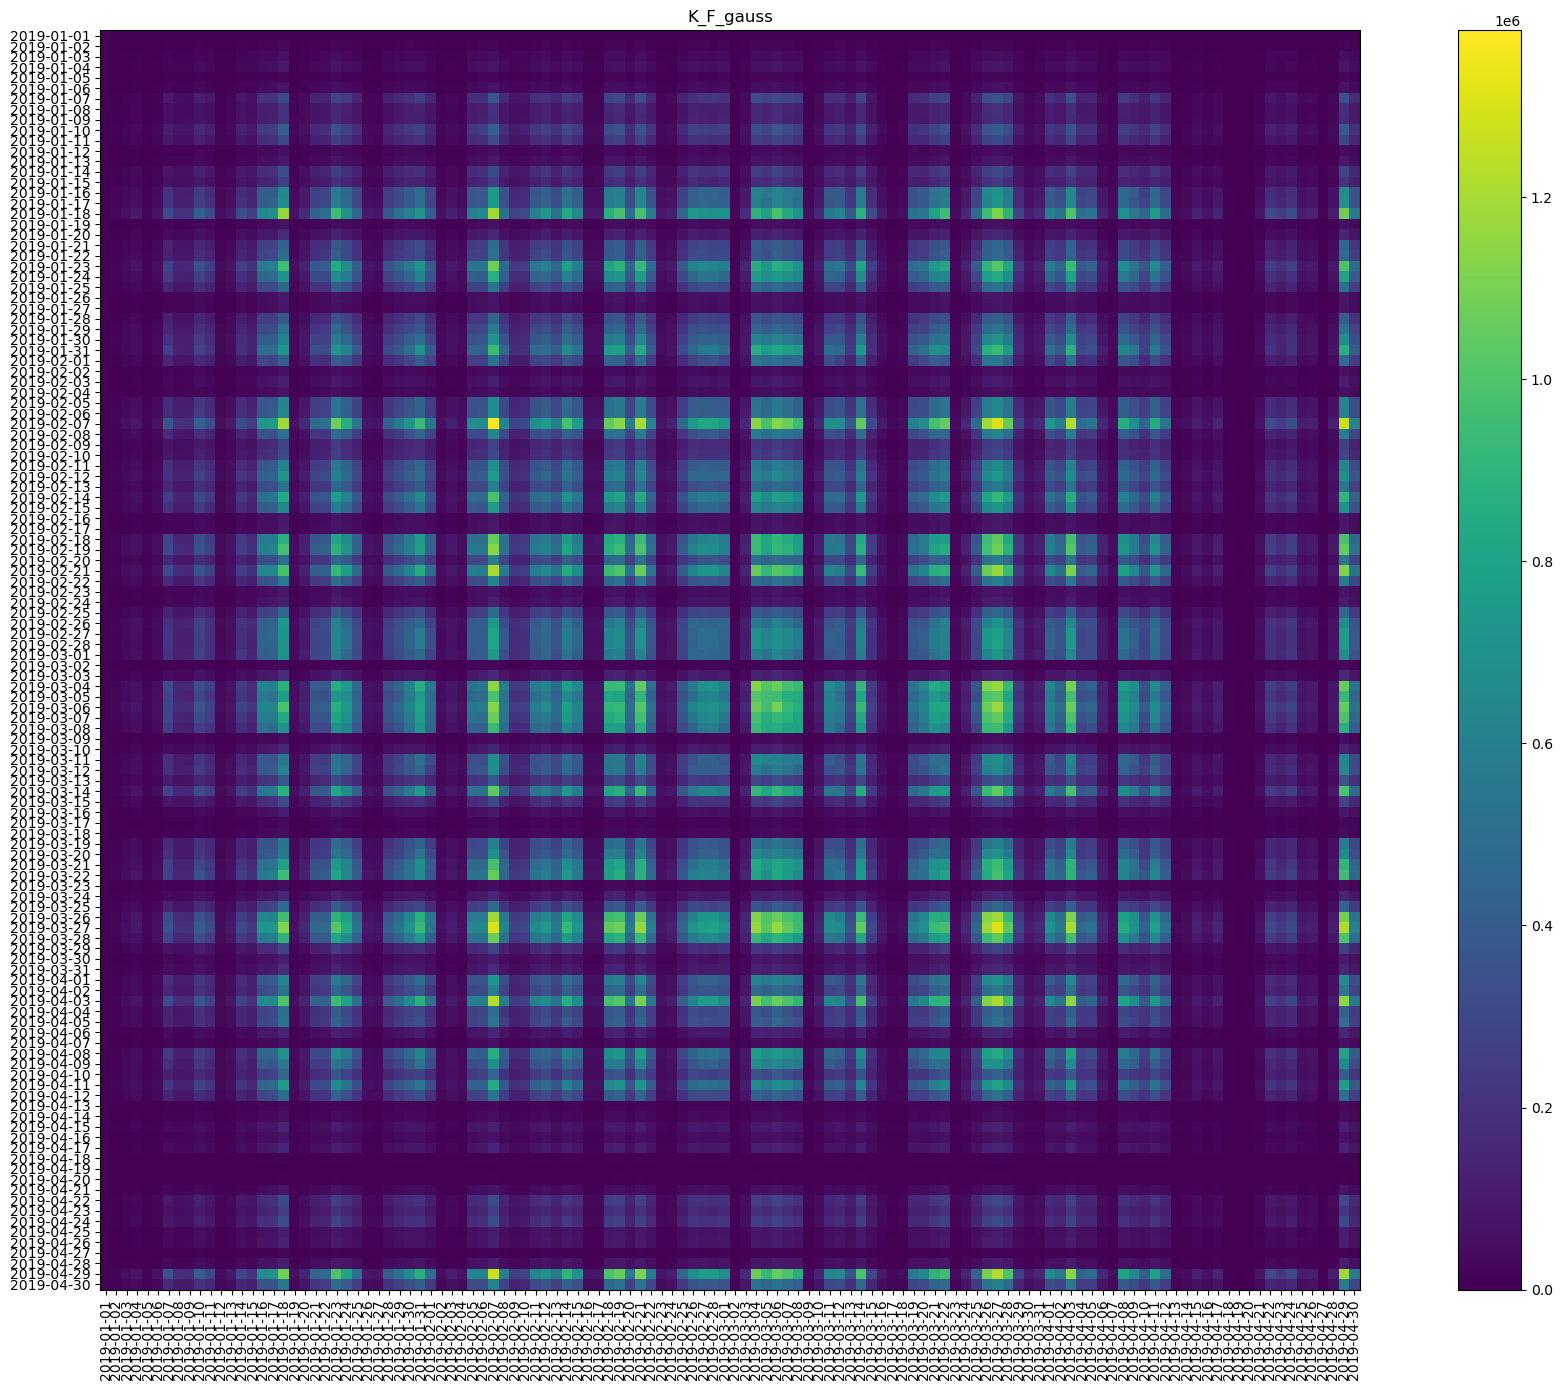

In [7]:
plot_heatmap(matriz, 'K_F_gauss', dates)

/var/folders/vk/zp_d1g0941s_66x6rkq_912w0000gn/T/ipykernel_3066/1964130726.py:3: RuntimeWarning: invalid value encountered in divide
  m = matrix / np.outer(diag, diag)


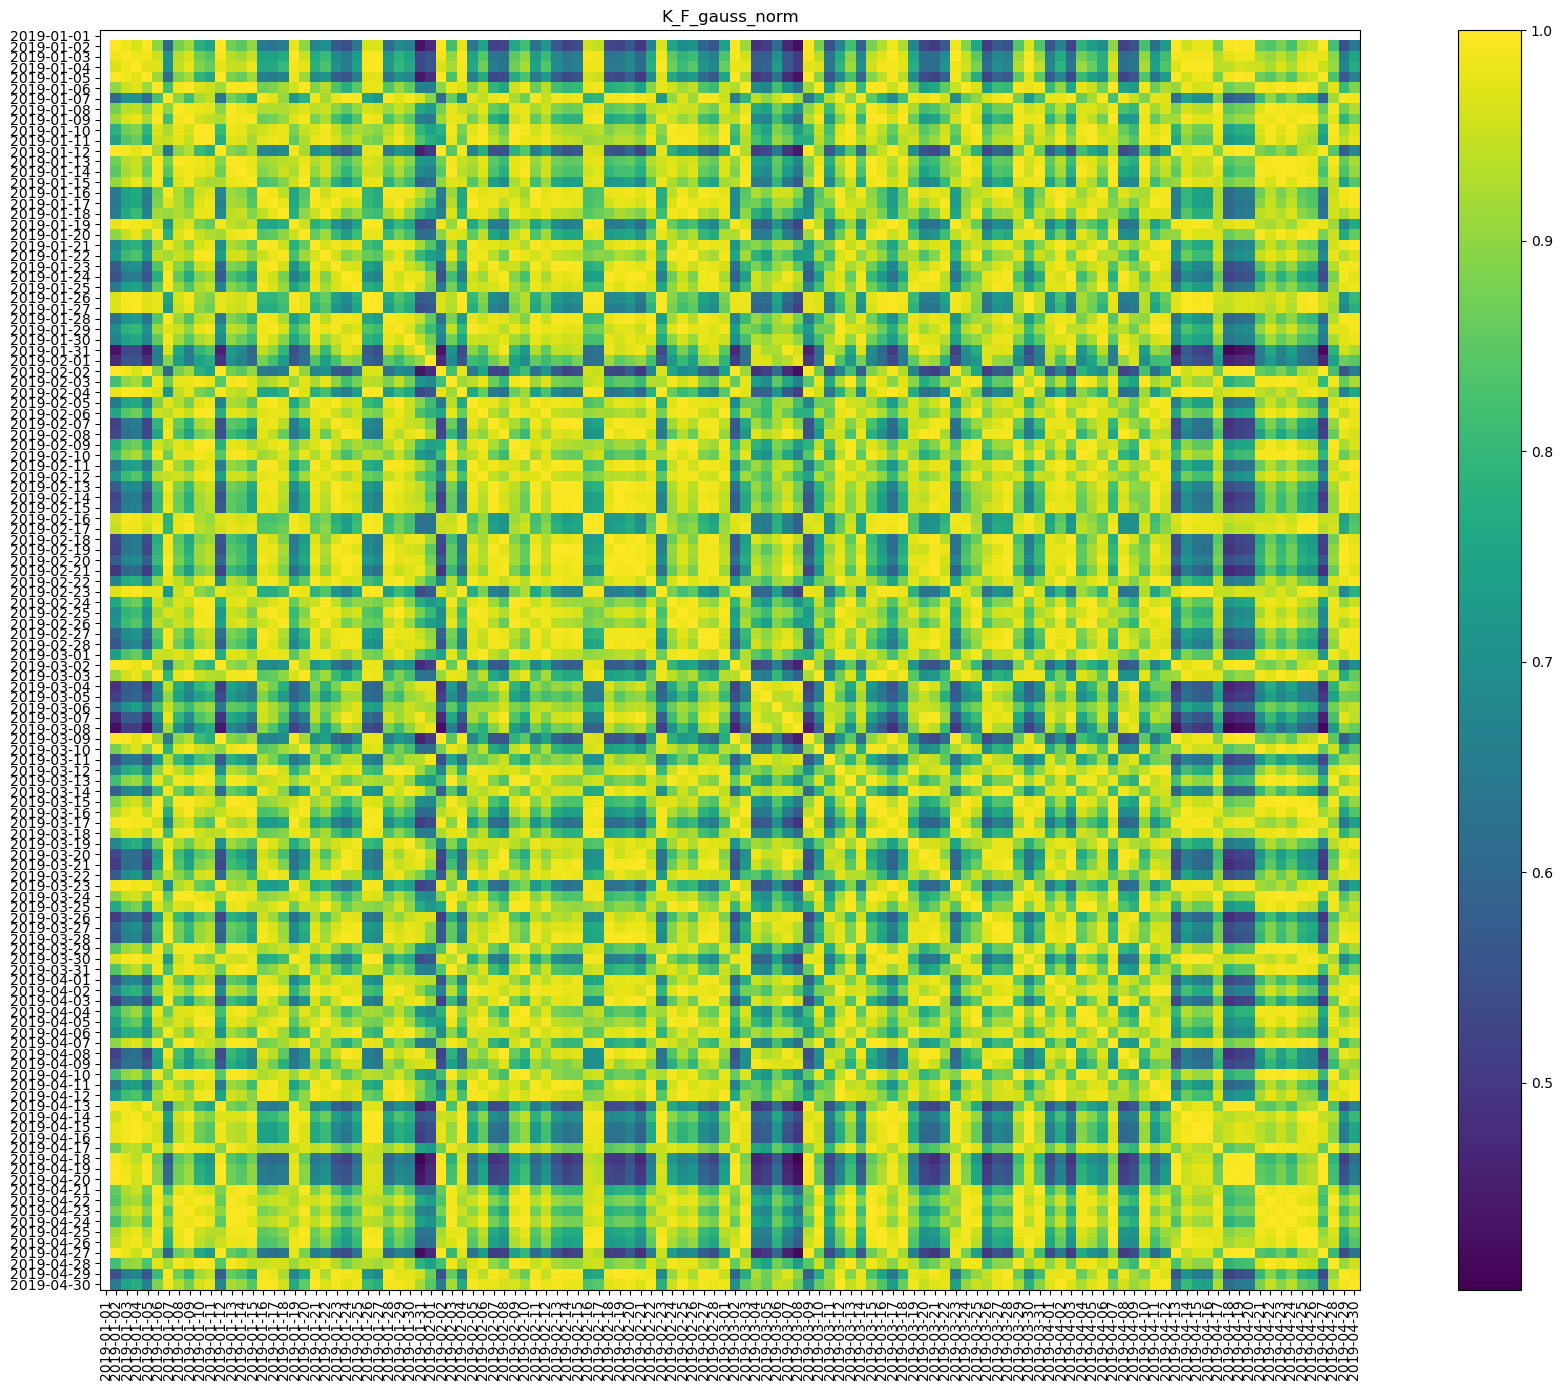

/Users/antoniomendez/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/_array_api.py:701: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/antoniomendez/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/utils/_array_api.py:718: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


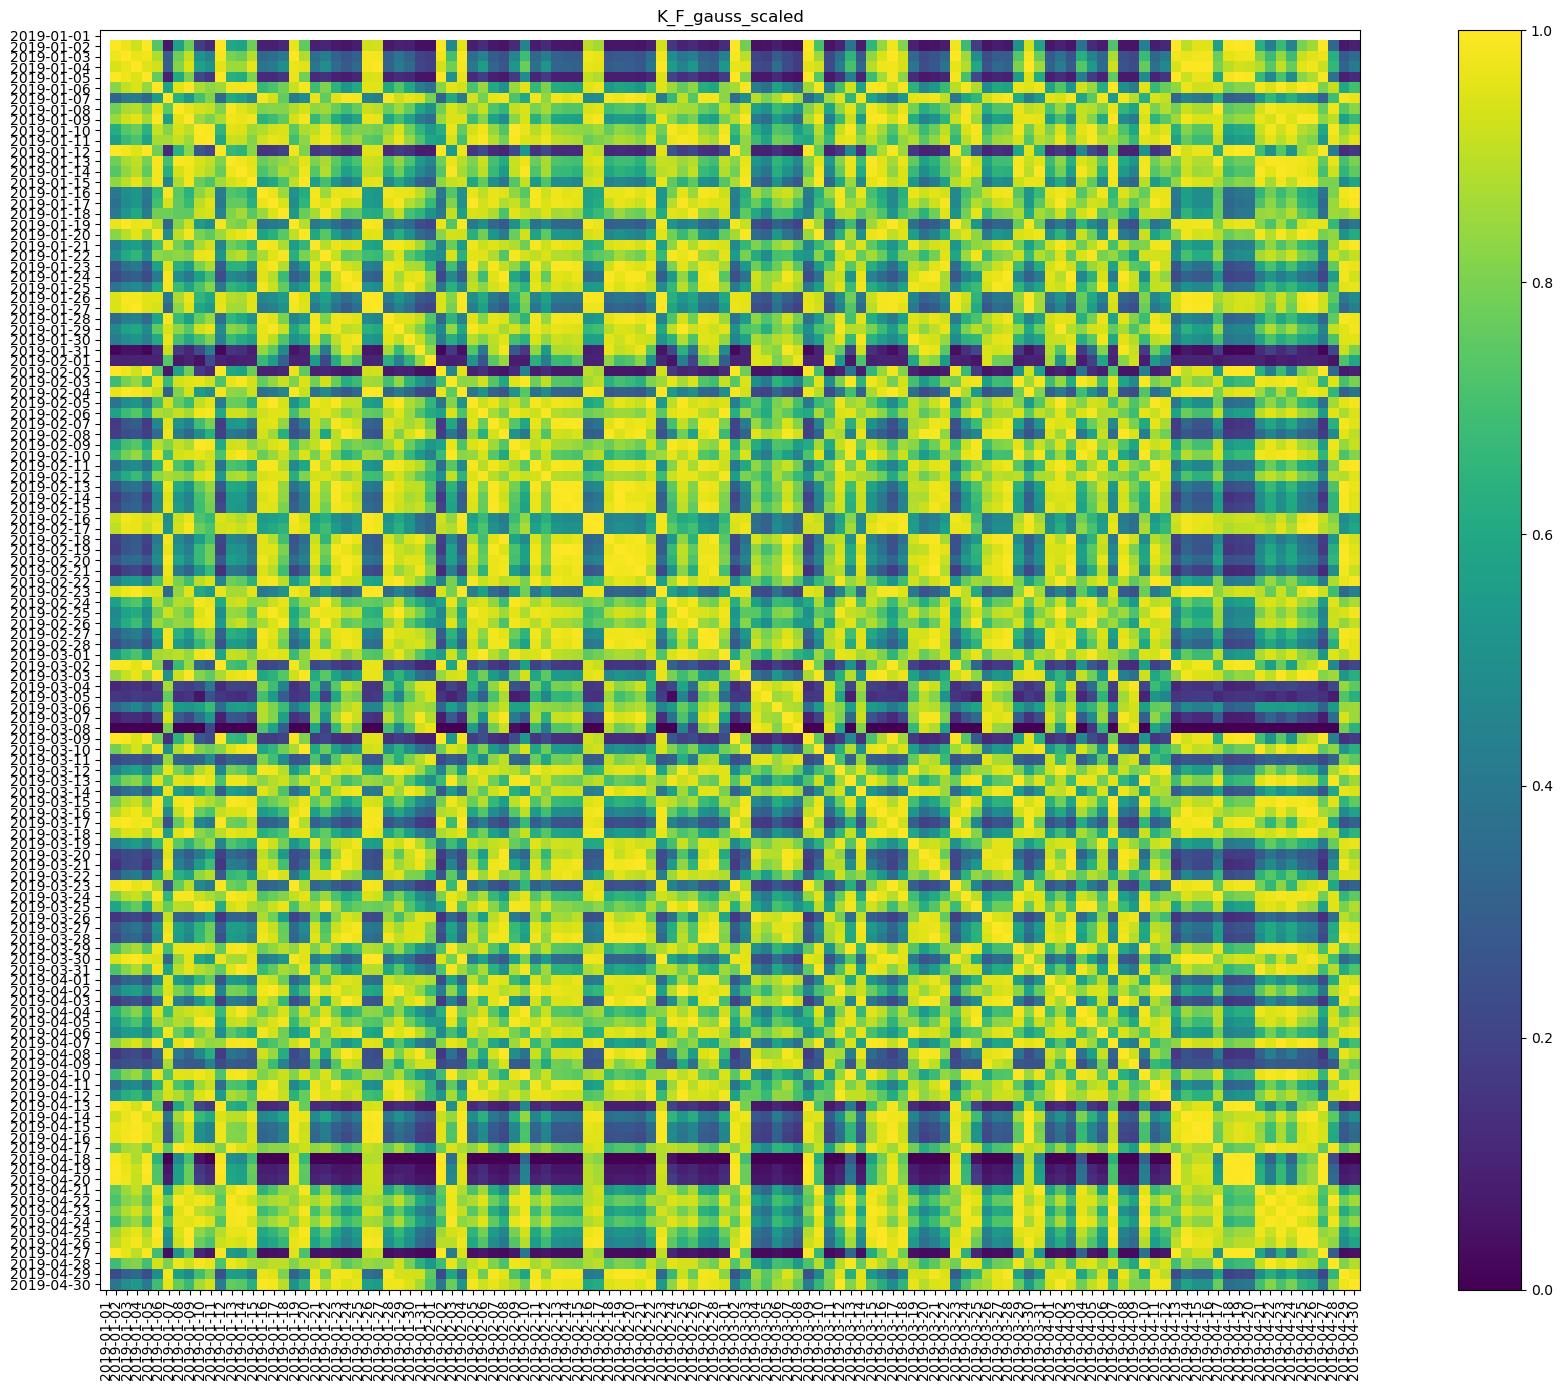

In [16]:
matriz_norm = normalize_matrix(matriz)
plot_heatmap(matriz_norm, 'K_F_gauss_norm', dates)
matriz_scaled = MinMaxScaler().fit_transform(matriz_norm)
plot_heatmap(matriz_scaled, 'K_F_gauss_scaled', dates)

In [12]:
is_symmetric = np.allclose(matriz_scaled, matriz_scaled.T, equal_nan=True)
print(f"La matriz escalada es simétrica: {is_symmetric}")

La matriz escalada es simétrica: False


In [18]:
def is_positive_definite(matrix):
    # Verificar si la matriz es cuadrada
    if matrix.shape[0] != matrix.shape[1]:
        raise ValueError("La matriz debe ser cuadrada")

    # Calcular los valores propios de la matriz
    eigenvalues = np.linalg.eigvals(matrix)
    print(eigenvalues)

    # Verificar si todos los valores propios son positivos
    return np.all(eigenvalues > 0)


In [19]:
is_positive_definite(matriz)

[ 3.33114493e+07+0.00000000e+00j  1.51618781e+06+0.00000000e+00j
  4.80448872e+05+0.00000000e+00j  1.33743666e+05+0.00000000e+00j
  8.33581591e+04+0.00000000e+00j  3.67116216e+04+0.00000000e+00j
  9.40737855e+03+0.00000000e+00j  4.15669000e+03+0.00000000e+00j
  2.08160554e+03+0.00000000e+00j  7.80426746e+02+0.00000000e+00j
  2.49940454e+02+0.00000000e+00j  1.78851506e+02+0.00000000e+00j
  6.44712737e+01+0.00000000e+00j  3.35436047e+01+0.00000000e+00j
  1.13672102e+01+0.00000000e+00j  5.46636515e+00+0.00000000e+00j
  2.73740593e+00+0.00000000e+00j  1.14846996e+00+0.00000000e+00j
  3.20116712e-01+0.00000000e+00j  2.17650590e-01+0.00000000e+00j
  1.87103574e-01+0.00000000e+00j  8.07144068e-02+0.00000000e+00j
  2.34120200e-02+0.00000000e+00j  7.00951330e-03+0.00000000e+00j
  3.53280529e-03+0.00000000e+00j  2.42154176e-03+0.00000000e+00j
  7.75631191e-04+0.00000000e+00j  3.39959405e-04+0.00000000e+00j
  1.68680343e-04+0.00000000e+00j  3.18156262e-05+0.00000000e+00j
  5.35870852e-06+0.000000

False

In [20]:
matriz2 = np.load('K_F/K_test_dirac.npy')

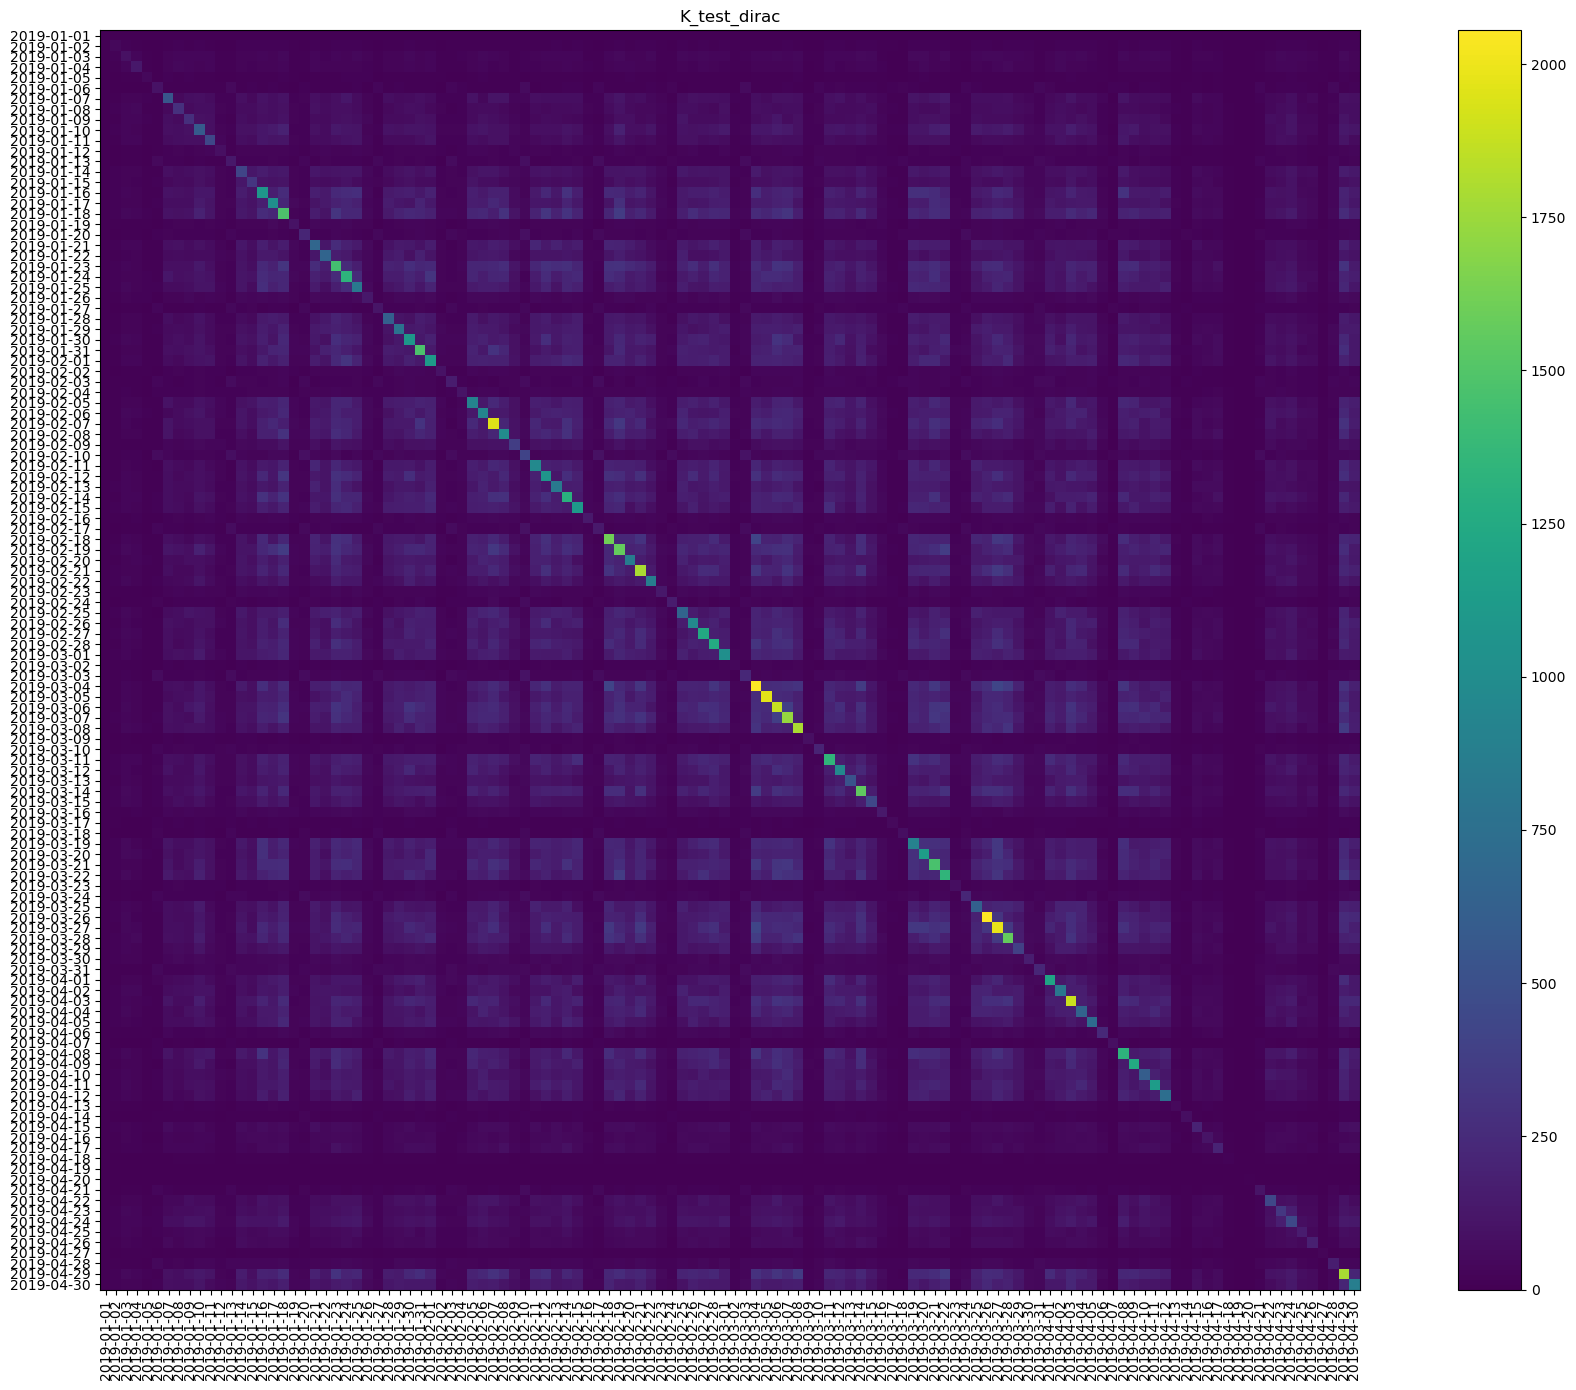

In [21]:
plot_heatmap(matriz2, 'K_test_dirac', dates)

In [22]:
is_positive_definite(matriz2)

[1.27994881e+04 2.24657469e+03 1.95096187e+03 1.89160437e+03
 1.82653490e+03 1.80769871e+03 1.76558713e+03 1.67840892e+03
 1.68681848e+03 1.61355366e+03 1.52079114e+03 1.50202413e+03
 1.48314791e+03 1.44860316e+03 1.38660906e+03 1.35352366e+03
 1.33846855e+03 1.31212897e+03 1.27387412e+03 1.24691627e+03
 1.23472623e+03 1.19051861e+03 1.14505388e+03 1.15934983e+03
 1.10761548e+03 1.05563624e+03 1.04115505e+03 1.03221503e+03
 9.93814809e+02 9.76210820e+02 9.67855700e+02 9.27917254e+02
 9.20579146e+02 8.88369059e+02 8.74785397e+02 8.44557873e+02
 8.27334590e+02 8.18991173e+02 7.97252300e+02 7.89034150e+02
 7.71262273e+02 7.50517080e+02 7.24533460e+02 7.14522040e+02
 6.94606500e+02 7.00737807e+02 6.81171256e+02 6.67250127e+02
 6.59178099e+02 6.00750645e+02 6.14687433e+02 6.26285178e+02
 5.94784442e+02 5.73862533e+02 5.43340582e+02 5.27953149e+02
 5.58301738e+02 5.03439019e+02 4.54509476e+02 4.85600429e+02
 4.76464985e+02 4.21867459e+02 4.07102656e+02 3.95910088e+02
 3.81284709e+02 3.642210

False

In [25]:
matriz2_scaled = MinMaxScaler().fit_transform(matriz2)

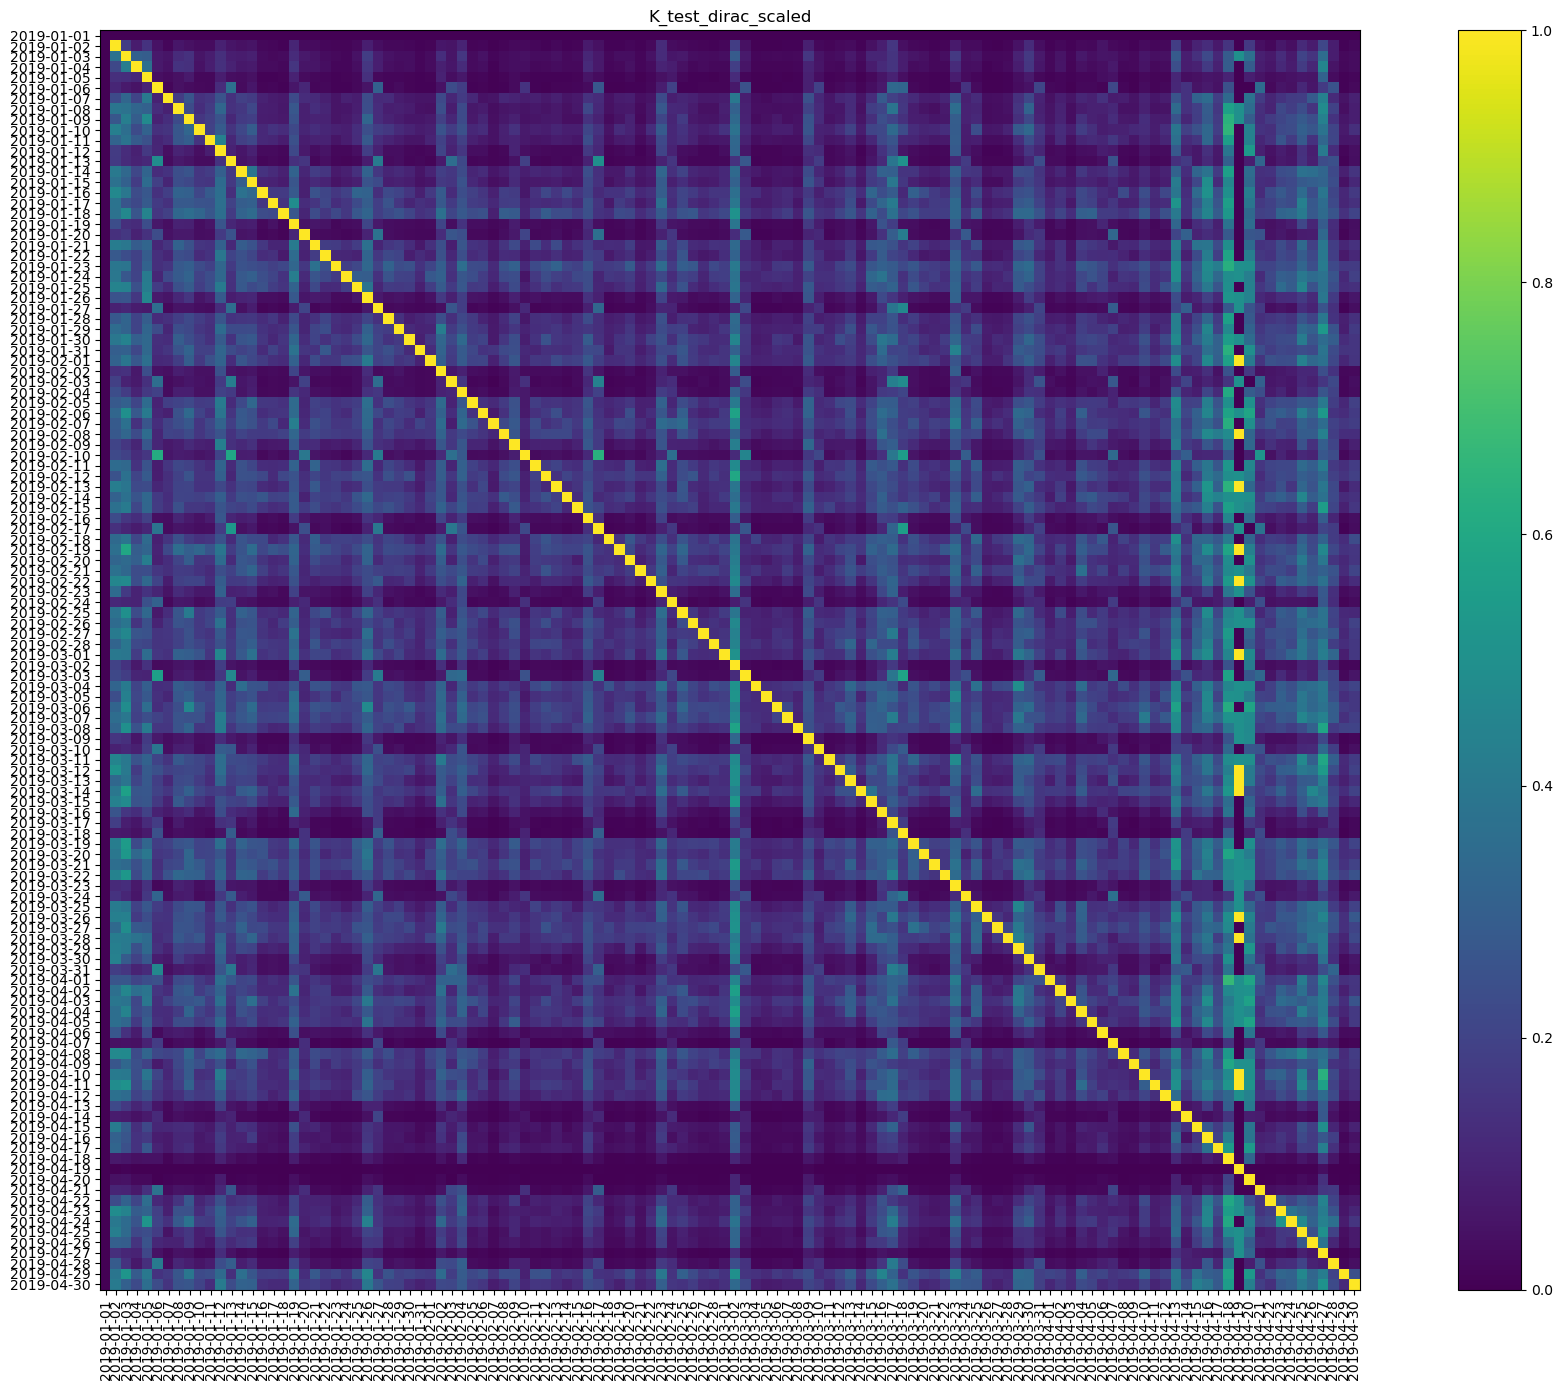

In [26]:
plot_heatmap(matriz2_scaled, 'K_test_dirac_scaled', dates)

In [2]:
#dir = '/home/user/Desktop/Datos/'
dir = '/Users/antoniomendez/Desktop/Tesis/Datos/datos_limpios/'

In [3]:
data_2019_mibici = pd.read_csv(dir + 'mibici/mibici_2019.csv')
data_2019_eco = pd.read_csv(dir + 'ecobici/ecobici_2019.csv')

In [4]:
h1 = data_2019_mibici.head()
latex1 = h1.to_latex(index=False)
print(latex1)

\begin{tabular}{rrlrllrrr}
\toprule
Viaje_Id & Usuario_Id & Genero & Año_de_nacimiento & Inicio_del_viaje & Fin_del_viaje & Origen_Id & Destino_Id & Tiempo_viaje \\
\midrule
8901295 & 341162 & M & 1992.000000 & 2019-01-01 00:00:00 & 2019-01-01 00:16:09 & 50 & 54 & 16.150000 \\
8901296 & 413443 & M & 1985.000000 & 2019-01-01 06:01:05 & 2019-01-01 06:16:27 & 38 & 194 & 15.366667 \\
8901297 & 444232 & M & 1995.000000 & 2019-01-01 06:01:19 & 2019-01-01 06:09:55 & 86 & 18 & 8.600000 \\
8901298 & 437533 & M & 1998.000000 & 2019-01-01 06:01:25 & 2019-01-01 06:02:04 & 86 & 86 & 0.650000 \\
8901299 & 430224 & M & 1992.000000 & 2019-01-01 06:01:57 & 2019-01-01 06:05:01 & 27 & 52 & 3.066667 \\
\bottomrule
\end{tabular}



In [5]:
h2 = data_2019_eco.head(3)
latex2 = h2.to_latex(index=False)
print(latex2)

\begin{tabular}{lrrrllrllr}
\toprule
Genero_Usuario & Edad_Usuario & Bici & Ciclo_Estacion_Retiro & Fecha_Retiro & Hora_Retiro & Ciclo_Estacion_Arribo & Fecha_Arribo & Hora_Arribo & Tiempo_viaje \\
\midrule
M & 36 & 11444 & 67 & 2019-01-01 & 0:08:44 & 36 & 2019-01-01 & 0:14:03 & 5.316667 \\
M & 36 & 9196 & 55 & 2019-01-01 & 0:12:05 & 136 & 2019-01-01 & 0:42:11 & 30.100000 \\
M & 38 & 2612 & 29 & 2019-01-01 & 0:13:15 & 115 & 2019-01-01 & 0:37:47 & 24.533333 \\
\bottomrule
\end{tabular}



In [6]:
names_mibici = [dir + f'mibici/mibici_{i}.csv' for i in range(2019, 2025)]

In [9]:
data_2019_mibici['Genero'].unique()

array(['M', 'F', nan], dtype=object)

In [14]:
nan_counts_mibici = data_2019_mibici['Genero'].isna().sum()
print(f'Cantidad de valores NaN en la columna Género de data_2019_mibici: {nan_counts_mibici}')

Cantidad de valores NaN en la columna Género de data_2019_mibici: 6139


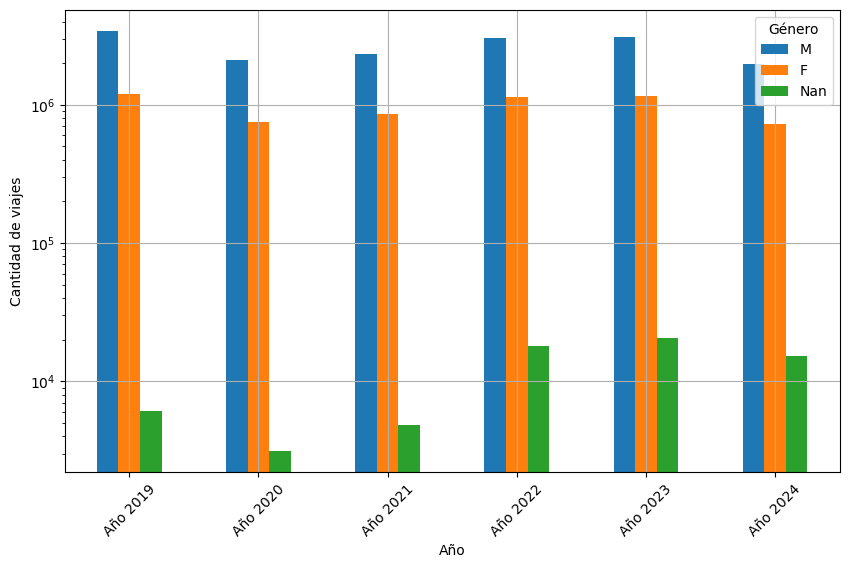

In [23]:
# Crear un diccionario para almacenar los conteos de cada género
gender_counts = {'M': [], 'F': [], 'Nan': []}

# Iterar sobre cada archivo en names_mibici
for file in names_mibici:
    # Cargar el dataset
    df = pd.read_csv(file)
    
    # Contar los valores de cada género
    counts = df['Genero'].value_counts()
    counts_nan = df['Genero'].isna().sum()
    
    # Agregar los conteos al diccionario
    gender_counts['M'].append(counts.get('M', 0))
    gender_counts['F'].append(counts.get('F', 0))
    gender_counts['Nan'].append(counts_nan)

# Crear un DataFrame con los conteos
#index = [f'Año {i+2019}' if i+2019 != 2024 else 'Año 2024 (hasta Julio)' for i in range(len(names_mibici))]
gender_counts_df = pd.DataFrame(gender_counts, index=[f'Año {i+2019}' for i in range(len(names_mibici))])

# Plotear el histograma
gender_counts_df.plot(kind='bar', figsize=(10, 6))
#plt.title('Cantidad de viajes por género')
plt.yscale('log')
plt.xlabel('Año')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid()
plt.savefig('graficas/viajes_por_genero_mibici.pdf', bbox_inches='tight')
plt.show()

In [17]:
names_ecobici = [dir + f'ecobici/ecobici_{i}.csv' for i in range(2019, 2025)]

/var/folders/vk/zp_d1g0941s_66x6rkq_912w0000gn/T/ipykernel_6068/319160299.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


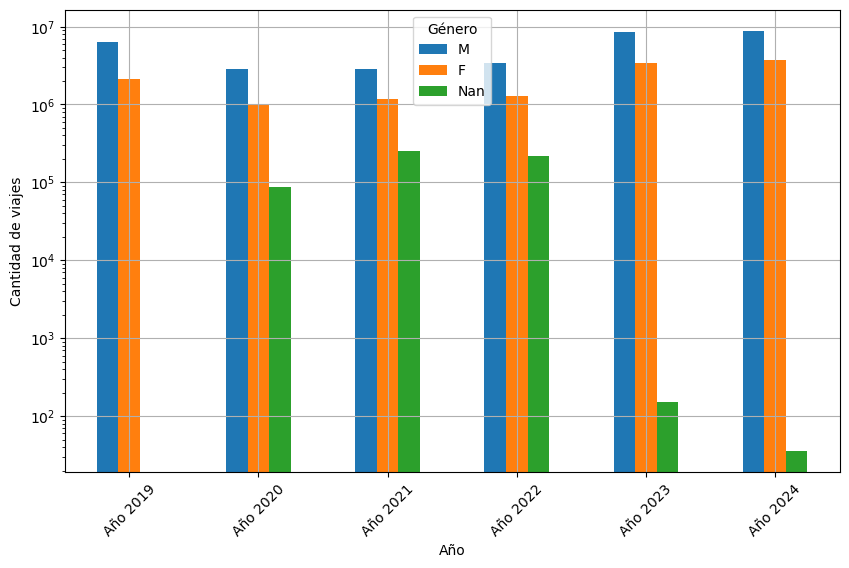

In [24]:
# Crear un diccionario para almacenar los conteos de cada género
gender_counts = {'M': [], 'F': [], 'Nan': []}

# Iterar sobre cada archivo en names_mibici
for file in names_ecobici:
    # Cargar el dataset
    df = pd.read_csv(file)
    
    # Contar los valores de cada género
    counts = df['Genero_Usuario'].value_counts()
    counts_nan = df['Genero_Usuario'].isna().sum()
    
    # Agregar los conteos al diccionario
    gender_counts['M'].append(counts.get('M', 0))
    gender_counts['F'].append(counts.get('F', 0))
    gender_counts['Nan'].append(counts_nan)

# Crear un DataFrame con los conteos
#index = [f'Año {i+2019}' if i+2019 != 2024 else 'Año 2024 (hasta Julio)' for i in range(len(names_mibici))]
gender_counts_df = pd.DataFrame(gender_counts, index=[f'Año {i+2019}' for i in range(len(names_mibici))])

# Plotear el histograma
gender_counts_df.plot(kind='bar', figsize=(10, 6))
#plt.title('Cantidad de viajes por género')
plt.yscale('log')
plt.xlabel('Año')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid()
plt.savefig('graficas/viajes_por_genero_ecobici.pdf', bbox_inches='tight')
plt.show()

In [20]:
data_2019_eco.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,Tiempo_viaje
0,M,36,11444,67,2019-01-01,0:08:44,36,2019-01-01,0:14:03,5.316667
1,M,36,9196,55,2019-01-01,0:12:05,136,2019-01-01,0:42:11,30.100000
2,M,38,2612,29,2019-01-01,0:13:15,115,2019-01-01,0:37:47,24.533333
3,M,43,7463,29,2019-01-01,0:13:36,115,2019-01-01,0:38:04,24.466667
4,M,37,3987,136,2019-01-01,0:15:30,35,2019-01-01,0:22:47,7.283333


In [21]:
data_2019_eco['Genero_Usuario'].unique()

array(['M', 'F'], dtype=object)